# 訓練データ、検証データ

多項式回帰の章で説明したように、項の次数は高ければ高いほど与えられたデータに近いようなモデルを作成することができます。

なぜかと言うと、高次数ではグラフの形を無理矢理曲げられて、データに完全一致するグラフを作成することができるからです。

→ 1つの点で1次方程式、2つの点で2次方程式を確定することができます。単純計算すると、n個データを完全に通るようなグラフを求める為に、n次方程式を作ればいいわけです。

しかし、出来上がったモデル（方程式）に予測したいデータを入力すると、高次数で作成したモデルでの精度が著しく低く言えます。

ここで考えられる手法は、データを「訓練データ」と「検証データ」に分ける手法になります。

訓練データで次数制御し、検証データでモデルの精度を判定します。

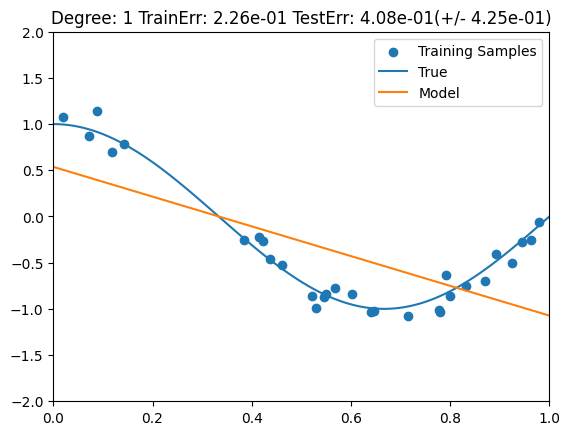

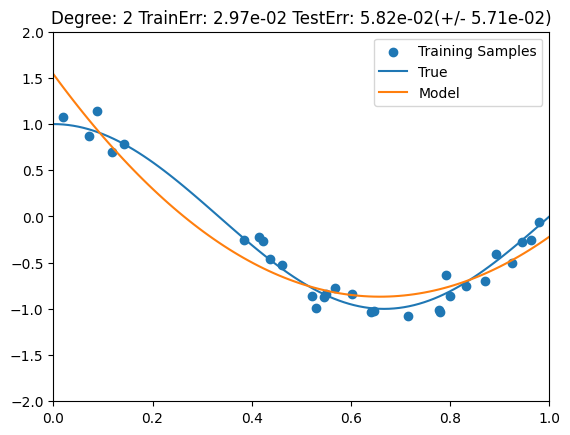

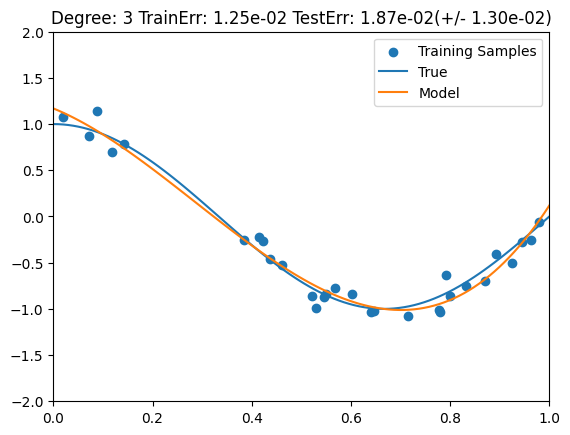

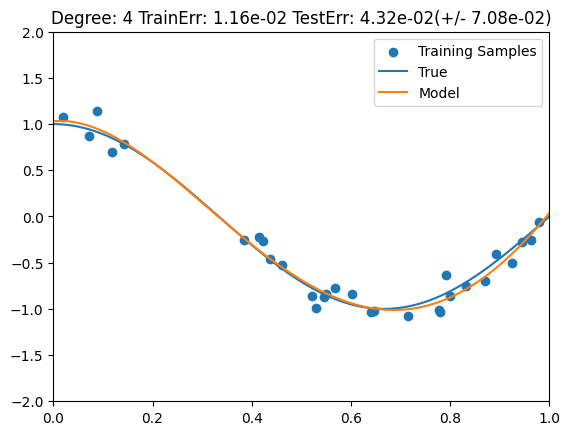

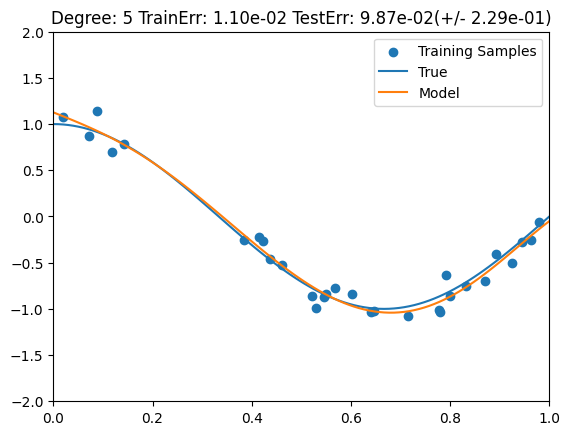

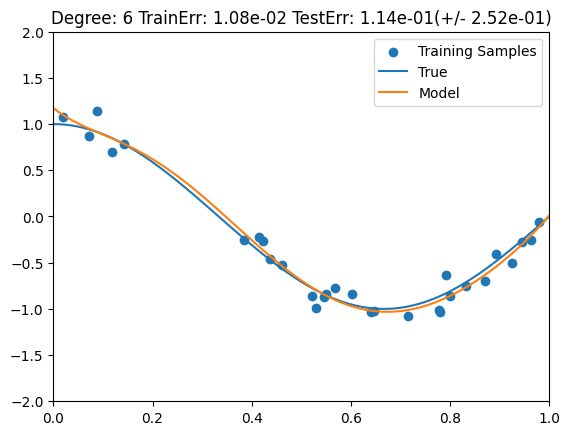

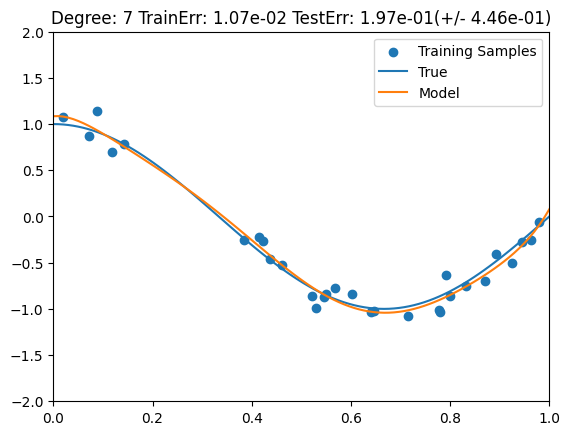

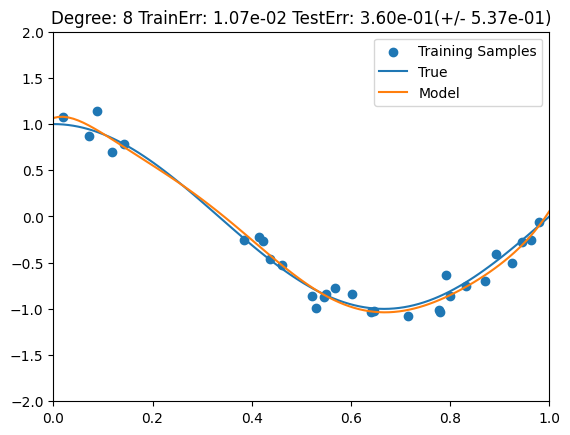

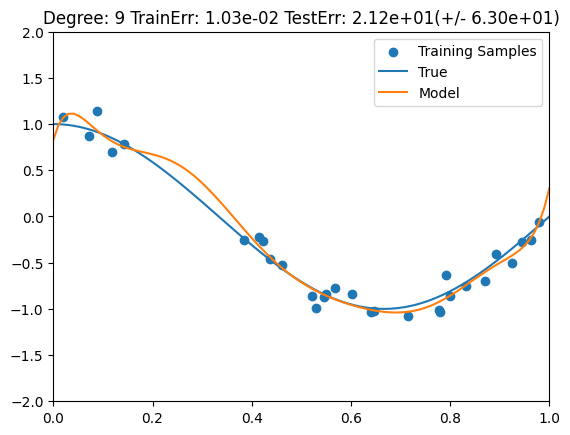

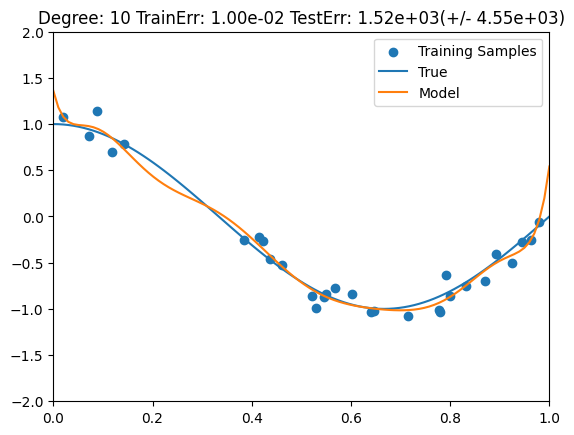

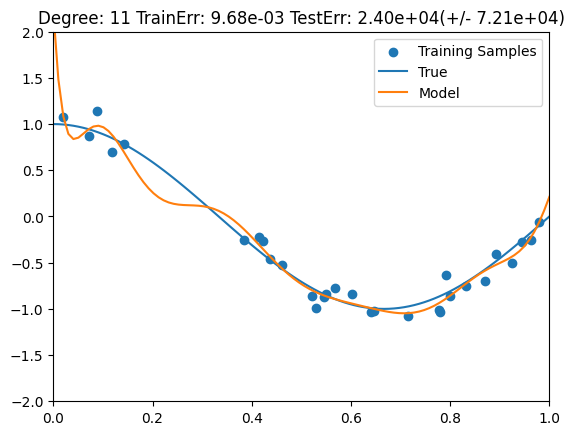

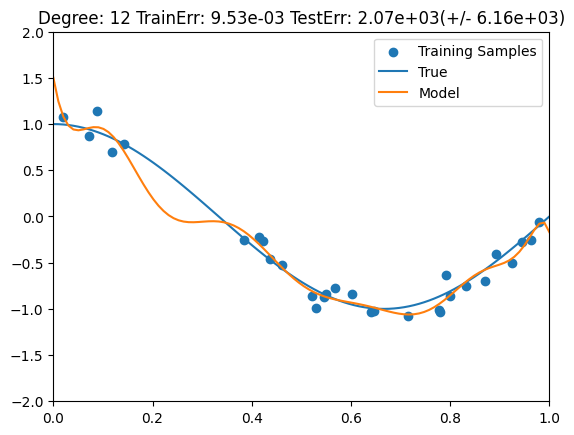

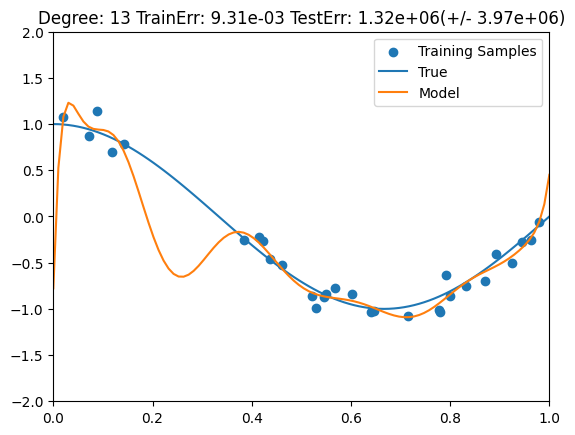

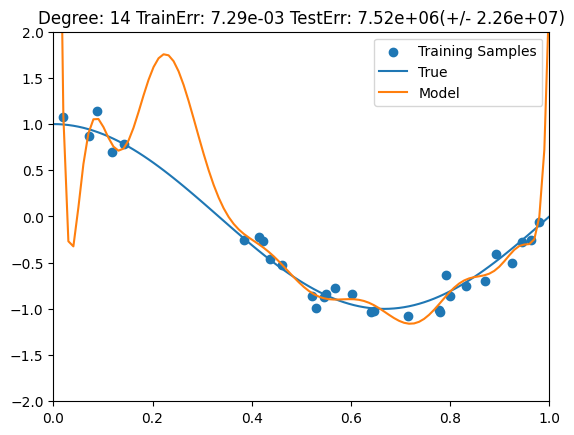

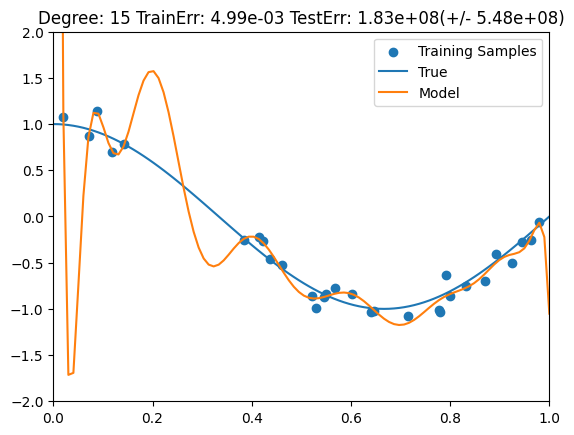

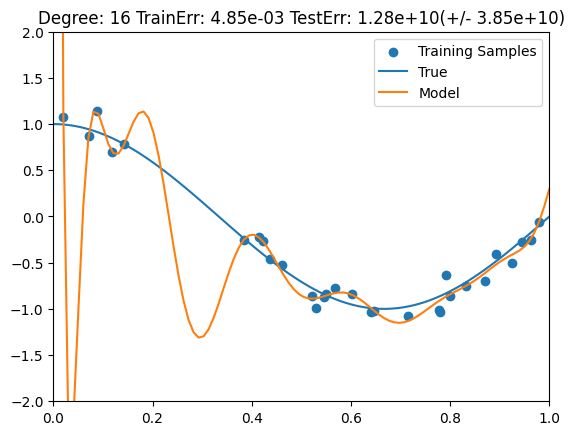

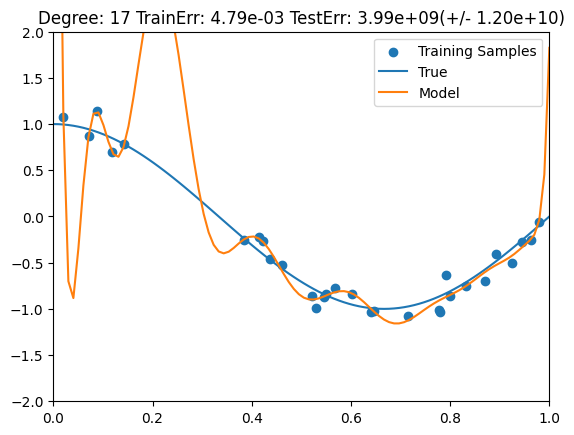

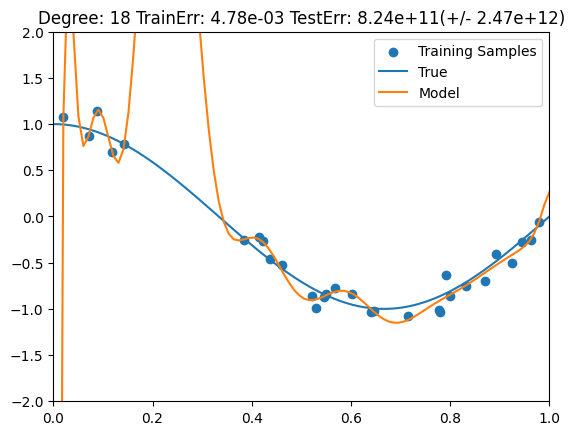

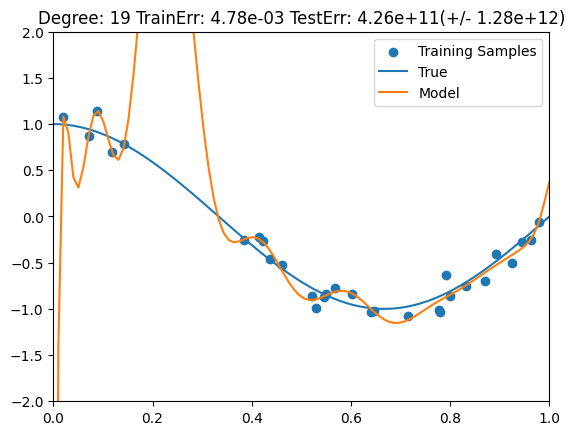

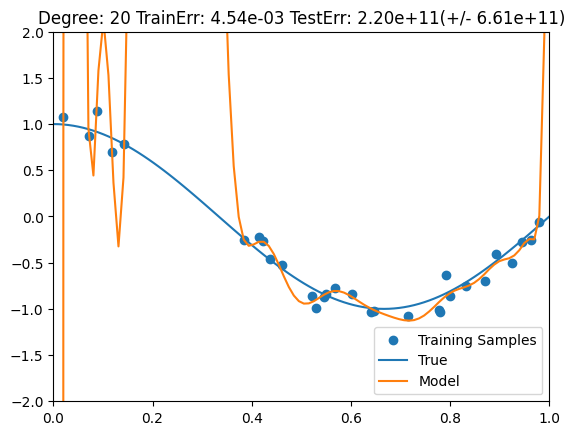

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

DEGREE = 20

def true_f(x):
    return np.cos(1.5 * x * np.pi)

np.random.seed(0)
n_samples = 30

x_plot = np.linspace(0,1,100)
x_tr = np.sort(np.random.rand(n_samples))
y_tr = true_f(x_tr) + np.random.randn(n_samples) * 0.1
X_tr = x_tr.reshape(-1,1)
X_plot = x_plot.reshape(-1,1)

trainErr = []
testErr = []


for degree in range(1,DEGREE+1):
    plt.scatter(x_tr,y_tr,label="Training Samples")
    plt.plot(x_plot,true_f(x_plot),label="True")
    plt.xlim(0,1)
    plt.ylim(-2,2)
    pf = PF(degree=degree,include_bias=False)
    linear_reg = linear_model.LinearRegression()
    steps = [("Polynomial_Features",pf),("Linear_Regression",linear_reg)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_tr,y_tr)
    plt.plot(x_plot,pipeline.predict(X_plot),label="Model")
    y_predict = pipeline.predict(X_tr)
    mse = mean_squared_error(y_tr,y_predict)
    scores = cross_val_score(pipeline,X_tr,y_tr,scoring="neg_mean_squared_error",cv=10)
    trainErr.append(mse)
    testErr.append(abs(scores.mean()))
    plt.title(f"Degree: {degree} TrainErr: {mse:.2e} TestErr: {-scores.mean():.2e}(+/- {scores.std():.2e})")
    plt.legend()
    plt.show()


それぞれのグラフからわかるように、途中までの予測モデルは実グラフに近かったが、

次数が高くなるにつれて、学習データにフィットする為に無理矢理グラフの形を曲げさせています。

In [2]:
for i in range(len(testErr)):
    print(f"degree: {i + 1}, training error: {trainErr[i]}, test error: {testErr[i]}")

degree: 1, training error: 0.22589234878199305, test error: 0.40772896250986834
degree: 2, training error: 0.029699730127918544, test error: 0.058184371207478026
degree: 3, training error: 0.012482607226527144, test error: 0.018747943073095977
degree: 4, training error: 0.01156479647150375, test error: 0.04320874987231815
degree: 5, training error: 0.010973006727297464, test error: 0.09867570671333872
degree: 6, training error: 0.010845773119790894, test error: 0.1143440450821521
degree: 7, training error: 0.01070468821531578, test error: 0.1971771141173686
degree: 8, training error: 0.010697567493178113, test error: 0.36031997154094625
degree: 9, training error: 0.010301776299279065, test error: 21.23256270554159
degree: 10, training error: 0.010004646507750771, test error: 1516.4370347441468
degree: 11, training error: 0.009682429344703591, test error: 24016.938691312458
degree: 12, training error: 0.009526698892114533, test error: 2071.7778538308708
degree: 13, training error: 0.009

それぞれの結果について再度確認します：

次数が高ければ高いほど、訓練誤差(training error)がどんどん0に近づいていくことがわかります。

しかし、テスト誤差(test error)から見れば、次数が3の場合は最も過学習していないモデルと言えるでしょう。